In [2]:
import set_mygulp_vars
from ase.calculators.gulp import GULP
import matplotlib.pyplot as plt
from math import ceil
from ase.spacegroup import crystal
import numpy as np
import re

In [8]:
def get_V(T):
    k = 4
    a = 3
    
    MgO_LD = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a, a, a, 90, 90, 90],primitive_cell=True)

    #the name of the calculation including the T
    label='mgo_LD_{}'.format(T)

    #setting the options fot the LD calculation
    options = ['shrink {} {} {}'.format(k, k, k), 'temperature {}'.format(T)]
    calc = GULP(label=label ,keywords='conp opti free_energy', library='ionic.lib', options=options)
    opt = calc.get_optimizer(MgO_LD)
    opt.run(fmax=0.05)
    V_value = 0
    #look for the optimised volume in the output
    for line in reversed(list(open(label+'.got'))):
        m = re.match(r'\s*\S+\s*cell volume =\s*(\S+)\s*\S+', line)
        if m:
            volume_f = float(m.group(1))
            break
            
    V_value = float(volume_f)
    #print('T =',T,', Volume =',V_value)
    return V_value

In [4]:
# define the function for gradient calculation
def grad(func,x0,step):
    y0 = func(x0)
    y1 = func(x0+step)
    grad_value = (y1-y0)/(step)
    return y1,grad_value

In [10]:
T_list = np.linspace(0,500,100)
V_list = []

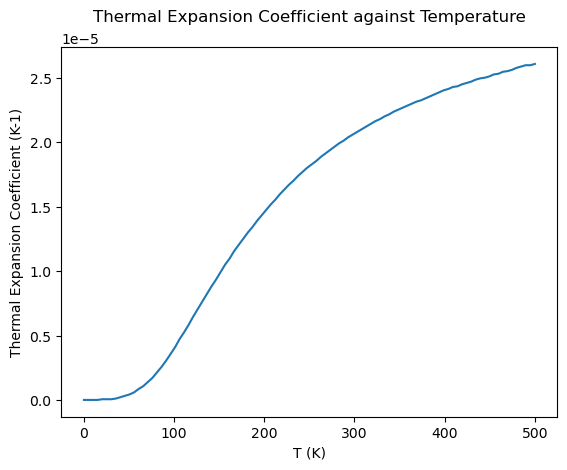

In [11]:
alpha_list = []
for i in T_list:
    y1,grad_value = grad(get_V, i, 1)
    alpha = grad_value/y1
    alpha_list.append(alpha)
    
plt.title("Thermal Expansion Coefficient against Temperature\n")

plt.plot(T_list, alpha_list)

plt.ylabel('Thermal Expansion Coefficient (K-1)')
plt.xlabel('T (K)')
plt.show()   

In [7]:
alist= [1.5529250223861315e-05,
 3.702653144825821e-05,
 2.763830282495272e-05,
 3.2348179074725943e-05,
 2.33601072947902e-05,
 2.9480532398183962e-05,
 2.218196659614562e-05,
 2.9133614120971958e-05,
 2.9814385289888477e-05,
 2.222750536474569e-05]

Tlist = np.array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [5]:
n = np.array([   0.        ,    3.90781563,    7.81563126,   11.72344689,
         15.63126253,   19.53907816,   23.44689379,   27.35470942,
         31.26252505,   35.17034068,   39.07815631,   42.98597194,
         46.89378758,   50.80160321,   54.70941884,   58.61723447,
         62.5250501 ,   66.43286573,   70.34068136,   74.24849699,
         78.15631263,   82.06412826,   85.97194389,   89.87975952,
         93.78757515,   97.69539078,  101.60320641,  105.51102204,
        109.41883768,  113.32665331,  117.23446894,  121.14228457,
        125.0501002 ,  128.95791583,  132.86573146,  136.77354709,
        140.68136273,  144.58917836,  148.49699399,  152.40480962,
        156.31262525,  160.22044088,  164.12825651,  168.03607214,
        171.94388778,  175.85170341,  179.75951904,  183.66733467,
        187.5751503 ,  191.48296593,  195.39078156,  199.29859719,
        203.20641283,  207.11422846,  211.02204409,  214.92985972,
        218.83767535,  222.74549098,  226.65330661,  230.56112224,
        234.46893788,  238.37675351,  242.28456914,  246.19238477,
        250.1002004 ,  254.00801603,  257.91583166,  261.82364729,
        265.73146293,  269.63927856,  273.54709419,  277.45490982,
        281.36272545,  285.27054108,  289.17835671,  293.08617234,
        296.99398798,  300.90180361,  304.80961924,  308.71743487,
        312.6252505 ,  316.53306613,  320.44088176,  324.34869739,
        328.25651303,  332.16432866,  336.07214429,  339.97995992,
        343.88777555,  347.79559118,  351.70340681,  355.61122244,
        359.51903808,  363.42685371,  367.33466934,  371.24248497,
        375.1503006 ,  379.05811623,  382.96593186,  386.87374749,
        390.78156313,  394.68937876,  398.59719439,  402.50501002,
        406.41282565,  410.32064128,  414.22845691,  418.13627255,
        422.04408818,  425.95190381,  429.85971944,  433.76753507,
        437.6753507 ,  441.58316633,  445.49098196,  449.3987976 ,
        453.30661323,  457.21442886,  461.12224449,  465.03006012,
        468.93787575,  472.84569138,  476.75350701,  480.66132265,
        484.56913828,  488.47695391,  492.38476954,  496.29258517,
        500.2004008 ,  504.10821643,  508.01603206,  511.9238477 ,
        515.83166333,  519.73947896,  523.64729459,  527.55511022,
        531.46292585,  535.37074148,  539.27855711,  543.18637275,
        547.09418838,  551.00200401,  554.90981964,  558.81763527,
        562.7254509 ,  566.63326653,  570.54108216,  574.4488978 ,
        578.35671343,  582.26452906,  586.17234469,  590.08016032,
        593.98797595,  597.89579158,  601.80360721,  605.71142285,
        609.61923848,  613.52705411,  617.43486974,  621.34268537,
        625.250501  ,  629.15831663,  633.06613226,  636.9739479 ,
        640.88176353,  644.78957916,  648.69739479,  652.60521042,
        656.51302605,  660.42084168,  664.32865731,  668.23647295,
        672.14428858,  676.05210421,  679.95991984,  683.86773547,
        687.7755511 ,  691.68336673,  695.59118236,  699.498998  ,
        703.40681363,  707.31462926,  711.22244489,  715.13026052,
        719.03807615,  722.94589178,  726.85370741,  730.76152305,
        734.66933868,  738.57715431,  742.48496994,  746.39278557,
        750.3006012 ,  754.20841683,  758.11623246,  762.0240481 ,
        765.93186373,  769.83967936,  773.74749499,  777.65531062,
        781.56312625,  785.47094188,  789.37875752,  793.28657315,
        797.19438878,  801.10220441,  805.01002004,  808.91783567,
        812.8256513 ,  816.73346693,  820.64128257,  824.5490982 ,
        828.45691383,  832.36472946,  836.27254509,  840.18036072,
        844.08817635,  847.99599198,  851.90380762,  855.81162325,
        859.71943888,  863.62725451,  867.53507014,  871.44288577,
        875.3507014 ,  879.25851703,  883.16633267,  887.0741483 ,
        890.98196393,  894.88977956,  898.79759519,  902.70541082,
        906.61322645,  910.52104208,  914.42885772,  918.33667335,
        922.24448898,  926.15230461,  930.06012024,  933.96793587,
        937.8757515 ,  941.78356713,  945.69138277,  949.5991984 ,
        953.50701403,  957.41482966,  961.32264529,  965.23046092,
        969.13827655,  973.04609218,  976.95390782,  980.86172345,
        984.76953908,  988.67735471,  992.58517034,  996.49298597,
       1000.4008016 , 1004.30861723, 1008.21643287, 1012.1242485 ,
       1016.03206413, 1019.93987976, 1023.84769539, 1027.75551102,
       1031.66332665, 1035.57114228, 1039.47895792, 1043.38677355,
       1047.29458918, 1051.20240481, 1055.11022044, 1059.01803607,
       1062.9258517 , 1066.83366733, 1070.74148297, 1074.6492986 ,
       1078.55711423, 1082.46492986, 1086.37274549, 1090.28056112,
       1094.18837675, 1098.09619238, 1102.00400802, 1105.91182365,
       1109.81963928, 1113.72745491, 1117.63527054, 1121.54308617,
       1125.4509018 , 1129.35871743, 1133.26653307, 1137.1743487 ,
       1141.08216433, 1144.98997996, 1148.89779559, 1152.80561122,
       1156.71342685, 1160.62124248, 1164.52905812, 1168.43687375,
       1172.34468938, 1176.25250501, 1180.16032064, 1184.06813627,
       1187.9759519 , 1191.88376754, 1195.79158317, 1199.6993988 ,
       1203.60721443, 1207.51503006, 1211.42284569, 1215.33066132,
       1219.23847695, 1223.14629259, 1227.05410822, 1230.96192385,
       1234.86973948, 1238.77755511, 1242.68537074, 1246.59318637,
       1250.501002  , 1254.40881764, 1258.31663327, 1262.2244489 ,
       1266.13226453, 1270.04008016, 1273.94789579, 1277.85571142,
       1281.76352705, 1285.67134269, 1289.57915832, 1293.48697395,
       1297.39478958, 1301.30260521, 1305.21042084, 1309.11823647,
       1313.0260521 , 1316.93386774, 1320.84168337, 1324.749499  ,
       1328.65731463, 1332.56513026, 1336.47294589, 1340.38076152,
       1344.28857715, 1348.19639279, 1352.10420842, 1356.01202405,
       1359.91983968, 1363.82765531, 1367.73547094, 1371.64328657,
       1375.5511022 , 1379.45891784, 1383.36673347, 1387.2745491 ,
       1391.18236473, 1395.09018036, 1398.99799599, 1402.90581162,
       1406.81362725, 1410.72144289, 1414.62925852, 1418.53707415,
       1422.44488978, 1426.35270541, 1430.26052104, 1434.16833667,
       1438.0761523 , 1441.98396794, 1445.89178357, 1449.7995992 ,
       1453.70741483, 1457.61523046, 1461.52304609, 1465.43086172,
       1469.33867735, 1473.24649299, 1477.15430862, 1481.06212425,
       1484.96993988, 1488.87775551, 1492.78557114, 1496.69338677,
       1500.6012024 , 1504.50901804, 1508.41683367, 1512.3246493 ,
       1516.23246493, 1520.14028056, 1524.04809619, 1527.95591182,
       1531.86372745, 1535.77154309, 1539.67935872, 1543.58717435,
       1547.49498998, 1551.40280561, 1555.31062124, 1559.21843687,
       1563.12625251, 1567.03406814, 1570.94188377, 1574.8496994 ,
       1578.75751503, 1582.66533066, 1586.57314629, 1590.48096192,
       1594.38877756, 1598.29659319, 1602.20440882, 1606.11222445,
       1610.02004008, 1613.92785571, 1617.83567134, 1621.74348697,
       1625.65130261, 1629.55911824, 1633.46693387, 1637.3747495 ,
       1641.28256513, 1645.19038076, 1649.09819639, 1653.00601202,
       1656.91382766, 1660.82164329, 1664.72945892, 1668.63727455,
       1672.54509018, 1676.45290581, 1680.36072144, 1684.26853707,
       1688.17635271, 1692.08416834, 1695.99198397, 1699.8997996 ,
       1703.80761523, 1707.71543086, 1711.62324649, 1715.53106212,
       1719.43887776, 1723.34669339, 1727.25450902, 1731.16232465,
       1735.07014028, 1738.97795591, 1742.88577154, 1746.79358717,
       1750.70140281, 1754.60921844, 1758.51703407, 1762.4248497 ,
       1766.33266533, 1770.24048096, 1774.14829659, 1778.05611222,
       1781.96392786, 1785.87174349, 1789.77955912, 1793.68737475,
       1797.59519038, 1801.50300601, 1805.41082164, 1809.31863727,
       1813.22645291, 1817.13426854, 1821.04208417, 1824.9498998 ,
       1828.85771543, 1832.76553106, 1836.67334669, 1840.58116232,
       1844.48897796, 1848.39679359, 1852.30460922, 1856.21242485,
       1860.12024048, 1864.02805611, 1867.93587174, 1871.84368737,
       1875.75150301, 1879.65931864, 1883.56713427, 1887.4749499 ,
       1891.38276553, 1895.29058116, 1899.19839679, 1903.10621242,
       1907.01402806, 1910.92184369, 1914.82965932, 1918.73747495,
       1922.64529058, 1926.55310621, 1930.46092184, 1934.36873747,
       1938.27655311, 1942.18436874, 1946.09218437, 1950.        ])
m = np.array([9.565673310605818e-07, 1.1034801767594717e-06, 1.2734567713873145e-06, 1.4655662238991875e-06,
              1.6788774838877696e-06, 1.912459357534043e-06, 2.1653805235427108e-06, 2.436709549107009e-06,
              2.725514905892916e-06, 3.030864986011989e-06, 3.351828118097281e-06, 3.687472583246065e-06,
              4.036866631139856e-06, 4.399077943754959e-06, 4.773064424682471e-06, 5.157542608499773e-06,
              5.5511970508067265e-06, 5.95271249271877e-06, 6.3607738855297405e-06, 6.774066414407195e-06,
              7.191275521084257e-06, 7.611086925572346e-06, 8.032186646817551e-06, 8.453261022432596e-06,
              8.87299672739149e-06, 9.290080791709766e-06, 9.703212476462137e-06, 1.011152567400252e-05,
              1.0514703625669087e-05, 1.0912464950239649e-05, 1.1304528416172127e-05, 1.1690612943366606e-05, 1.2070437604772993e-05, 1.2443721627831371e-05, 1.2810184395763977e-05, 1.316954544870585e-05, 1.3521524484691283e-05, 1.3865841360477458e-05, 1.4202216092205433e-05, 1.4530386889103313e-05, 1.485034614508253e-05, 1.5162274099147135e-05, 1.5466355406440854e-05, 1.576277473215919e-05, 1.6051716748469976e-05, 1.6333366131573462e-05, 1.6607907558753296e-05, 1.6875525705568873e-05, 1.713640524306691e-05, 1.7390730835094863e-05, 1.7638687135695592e-05, 1.7880458786521213e-05, 1.8116227148642642e-05, 1.834615095982603e-05, 1.8570379379100116e-05, 1.8789061515630642e-05, 1.900234646123263e-05, 1.9210383288821174e-05, 1.9413321050813666e-05, 1.9611308777626165e-05, 1.980449547617751e-05, 1.9993030128455652e-05, 2.0177061690095445e-05, 2.0356739089007328e-05, 2.0532211223945818e-05, 2.0703619128601382e-05, 2.0871074789414967e-05, 2.1034683454450012e-05, 2.119455035124574e-05, 2.1350780685982566e-05, 2.150347964267555e-05, 2.1652752382371627e-05, 2.179870404240872e-05, 2.194143973562415e-05, 2.2081064549660533e-05, 2.2217683546219102e-05, 2.2351401760382368e-05, 2.2482324147626268e-05, 2.261054791019489e-05, 2.2736154404652482e-05, 2.2859223028602598e-05, 2.297983315765566e-05, 2.309806414507503e-05, 2.3213995321323583e-05, 2.3327705993719027e-05, 2.343927544603656e-05, 2.3548782938124684e-05, 2.3656307705539646e-05, 2.376192895920601e-05, 2.386572588503964e-05, 2.396777662248227e-05, 2.406812687313653e-05, 2.416678401056372e-05, 2.426375319949949e-05, 2.4359039609041668e-05, 2.4452648412488923e-05, 2.454458478717104e-05, 2.4634853914317465e-05, 2.4723460978902437e-05, 2.481041116946682e-05, 2.4895709677998765e-05, 2.4979361699766644e-05, 2.5061372433175448e-05, 2.5141754401909267e-05, 2.5220613677266795e-05, 2.5298120897667593e-05, 2.5374447915368486e-05, 2.544976651013647e-05, 2.552424838897597e-05, 2.559806518578658e-05, 2.5671388460970258e-05, 2.574438970105332e-05, 2.5817240318171992e-05, 2.589011164958786e-05, 2.5963174957151087e-05, 2.6036601426689025e-05, 2.6110527501250646e-05, 2.6184868203846407e-05, 2.6259451548208154e-05, 2.6334105420007104e-05, 2.6408657785809815e-05, 2.648293669355279e-05, 2.655677027296268e-05, 2.6629986735843833e-05, 2.670241437631171e-05, 2.677388157092749e-05, 2.684421677874344e-05, 2.6913248541255313e-05, 2.6980805485965385e-05, 2.7046747885219488e-05, 2.7111044358773922e-05, 2.717368674098682e-05, 2.7234666867695973e-05, 2.72939765764246e-05, 2.7351607706570456e-05, 2.7407552099620748e-05, 2.7461801599374637e-05, 2.7514348052133827e-05, 2.756518330693049e-05, 2.761429921573261e-05, 2.766168763366614e-05, 2.7707341185994944e-05, 2.775133963412748e-05, 2.7793928962220834e-05, 2.7835373741838933e-05, 2.787593842871186e-05, 2.7915887362225657e-05, 2.7955484764899506e-05, 2.7994994741858027e-05, 2.803468128028918e-05, 2.8074808248923182e-05, 2.811563939747118e-05, 2.8157438356094203e-05, 2.8200468634839283e-05, 2.824498586823127e-05, 2.829103036456833e-05, 2.833840450773027e-05, 2.8386898460880014e-05, 2.8436302482771852e-05, 2.848640692825914e-05, 2.8537002248712743e-05, 2.8587878992408274e-05, 2.8638827804907754e-05, 2.868963942935814e-05, 2.874010470678262e-05, 2.879001457631849e-05, 2.8839160075416484e-05, 2.8887344734078628e-05, 2.8934516239067805e-05, 2.8980715235578297e-05, 2.902598389853136e-05, 2.9070364383143377e-05, 2.9113898824947136e-05, 2.9156629339764164e-05, 2.919859802372279e-05, 2.9239846953225393e-05, 2.9280418184953897e-05, 2.9320353755835698e-05, 2.9359695683029255e-05, 2.9398485963886755e-05, 2.943677015141396e-05, 2.9474614861775494e-05, 2.9512094382453538e-05, 2.954928297812842e-05, 2.9586254879199815e-05, 2.9623084281645333e-05, 2.9659845346924305e-05, 2.9696612201860246e-05, 2.9733458938535275e-05, 2.97704596141668e-05, 2.980768825103134e-05, 2.984521883634291e-05, 2.9883125312432667e-05, 2.9921454943893332e-05, 2.9960170261494544e-05, 2.999921701524237e-05, 3.0038540980719436e-05, 3.0078087959139974e-05, 3.011780377744334e-05, 3.0157634288354024e-05, 3.019752537045806e-05, 3.0237422928277264e-05, 3.027727289233592e-05, 3.031702121924185e-05, 3.0356613891747036e-05, 3.039599722857298e-05,
              3.0435145421934595e-05, 3.0474082223050996e-05, 3.051283647843789e-05, 3.055143702061956e-05, 3.058991266811774e-05, 3.062829222537337e-05, 3.0666604482749094e-05, 3.0704878216458935e-05, 3.074314218854919e-05, 3.0781425146843595e-05, 3.0819755824921094e-05, 3.0858162942054206e-05, 3.089667381651648e-05, 3.093528185871958e-05, 3.0973945439866135e-05, 3.101262133553943e-05, 3.105126634330146e-05, 3.1089837282740224e-05, 3.1128290995523885e-05, 3.116658434545495e-05, 3.1204674218505476e-05, 3.124251752287069e-05, 3.1280071188996394e-05, 3.131729216960995e-05, 3.1354137439751005e-05, 3.139057499269364e-05, 3.1426689449229783e-05, 3.1462635612810734e-05, 3.149856917239967e-05, 3.153464573683502e-05, 3.157102083458284e-05, 3.1607849913450034e-05, 3.164528834029019e-05, 3.168349140057475e-05, 3.1722614297977055e-05, 3.176281215389206e-05, 3.180424000687879e-05, 3.1847052812081065e-05, 3.18913178936963e-05, 3.193662535745078e-05, 3.1982403743630704e-05, 3.2028081764230104e-05, 3.207308843461737e-05, 3.211685307383933e-05, 3.2158805304146304e-05, 3.219837504988847e-05, 3.223499253567064e-05, 3.2268088283789e-05, 3.229709311102819e-05, 3.232143812467471e-05, 3.234055524776584e-05, 3.235453270212868e-05, 3.236539311166223e-05, 3.237551288486441e-05, 3.238726722304246e-05, 3.2403030115030635e-05, 3.242517431976167e-05, 3.2456071336779795e-05, 3.2498091364697566e-05, 3.2553603247599224e-05, 3.262497440948085e-05, 3.271457077664806e-05, 3.2824756688208284e-05, 3.295785951476725e-05, 3.311363810107972e-05, 3.328759023803769e-05, 3.347481475268693e-05, 3.3670413603073246e-05, 3.38694919970309e-05, 3.406715845668916e-05, 3.425852482890651e-05, 3.4438706241651536e-05, 3.4602821006515395e-05, 3.4745990467443875e-05, 3.486333879582253e-05, 3.494999273196886e-05, 3.500126372900599e-05, 3.501641877910104e-05, 3.499854762124012e-05, 3.4950894146485446e-05, 3.4876700226942994e-05, 3.4779205961643906e-05, 3.466164988461237e-05, 3.452726913522733e-05, 3.4379299590976455e-05, 3.422097596257519e-05, 3.4055531851623084e-05, 3.388619977073408e-05, 3.371621112628646e-05, 3.354874712287752e-05, 3.338651193415671e-05, 3.323194088997562e-05, 3.308746477783613e-05, 3.2955512784706135e-05, 3.2838512480587995e-05, 3.273888981718338e-05, 3.265906914154093e-05, 3.2601473224663864e-05, 3.256852330508707e-05, 3.256263914736077e-05, 3.258623911541102e-05, 3.264174026073217e-05, 3.273065625093632e-05, 3.2849951735386115e-05, 3.2995162985585855e-05, 3.3161828222747935e-05, 3.334548808556774e-05, 3.354168558774073e-05, 3.374596608734174e-05, 3.3953877268078614e-05, 3.416096913236867e-05, 3.436279400622892e-05, 3.4554906555932145e-05, 3.473286381647243e-05, 3.4892227625249416e-05, 3.503018360190636e-05, 3.514835634872189e-05, 3.524912196886581e-05, 3.5334855335099695e-05, 3.540793006220845e-05, 3.5470718482870046e-05, 3.552559162687543e-05, 3.557491920380118e-05, 3.5621069588990633e-05, 3.566640981298011e-05, 3.571330555424213e-05, 3.576412113532779e-05, 3.582119516302283e-05, 3.588540355575275e-05, 3.595535697395994e-05, 3.602947210041173e-05, 3.610616654257983e-05, 3.618385883157694e-05, 3.626096842020424e-05, 3.6335915680285655e-05, 3.640712189911996e-05, 3.6473009275123056e-05, 3.653200091270571e-05, 3.658252081629568e-05, 3.6622993883560524e-05, 3.665190805133007e-05, 3.666895295717366e-05, 3.6674904410119124e-05, 3.667057688127682e-05, 3.6656784361929685e-05, 3.6634340367381424e-05, 3.660405794065952e-05, 3.6566749656006524e-05, 3.652322762225587e-05, 3.647430348598211e-05, 3.6420788434480335e-05, 3.6363493198618546e-05, 3.630322805547452e-05, 3.624093707153659e-05, 3.6178757356386425e-05, 3.6119450255997685e-05, 3.6065781143830766e-05, 3.602051389634598e-05, 3.598641085950011e-05, 3.596623280137358e-05, 3.5962738850977876e-05, 3.5978686423238474e-05, 3.601683113022341e-05, 3.6079926678615704e-05, 3.617072475348195e-05, 3.6291974888386505e-05, 3.644527948948699e-05, 3.662689810475363e-05, 3.683153604025994e-05, 3.705390194946155e-05, 3.728870820894602e-05, 3.753067105812575e-05, 3.7774510683846734e-05, 3.801495125003516e-05, 3.824672087257272e-05, 3.8464551539422934e-05, 3.8663178976274365e-05, 3.8837342457720995e-05, 3.898178932861724e-05, 3.9093260556431804e-05,
              3.9173559131838925e-05, 3.9225278562316854e-05, 3.925101027712758e-05, 3.92533438270391e-05, 3.9234867057388185e-05, 3.9198166254543315e-05, 3.914582626575864e-05, 3.9080430592616066e-05, 3.900456145794642e-05, 3.892079984637594e-05, 3.883172551855102e-05, 3.873991521367521e-05, 3.86478546580214e-05, 3.855789824619304e-05, 3.847238866292392e-05, 3.839366700241755e-05, 3.8324072736714324e-05, 3.8265943697452e-05, 3.822161607094451e-05, 3.8193424406628864e-05, 3.818370163874687e-05, 3.819477912131609e-05, 3.82289866763195e-05, 3.828865265506157e-05, 3.837591159826192e-05, 3.848956536667829e-05, 3.86255992360853e-05, 3.8779912333159435e-05, 3.894840638531153e-05, 3.912698568473301e-05, 3.931155706066291e-05, 3.949802985989545e-05, 3.968231593551162e-05, 3.986032964375615e-05, 4.00279878491172e-05, 4.018120993755528e-05, 4.0315917837847245e-05, 4.042854186187687e-05, 4.0519644916267345e-05, 4.05918061462062e-05, 4.0647616764122703e-05, 4.068966637492606e-05, 4.072054296166859e-05, 4.074283287247236e-05, 4.0759120808802226e-05, 4.0771989815059356e-05, 4.078402126945648e-05, 4.079779487623294e-05, 4.081588865918325e-05, 4.0840878956426545e-05, 4.087480198719218e-05, 4.091736701519126e-05, 4.096765572911845e-05, 4.102475039703076e-05, 4.108773387729407e-05, 4.115568961985361e-05, 4.122770166767238e-05, 4.1302854658279666e-05, 4.138023382549375e-05, 4.1458925001297e-05, 4.153801461783808e-05, 4.16165897095892e-05, 4.1693739038243026e-05, 4.1768865995222497e-05, 4.1842116534166686e-05, 4.191374370575951e-05, 4.198400039456348e-05, 4.20531393183114e-05, 4.21214130272356e-05, 4.218907390339378e-05, 4.2256374159980556e-05, 4.2323565840646326e-05, 4.239090081882696e-05, 4.24586307970379e-05, 4.2527007306223675e-05, 4.2596278562751625e-05, 4.266655859681765e-05, 4.273778009705785e-05, 4.2809862931861373e-05, 4.2882727022685354e-05, 4.295629234422445e-05, 4.3030478924696016e-05, 4.310520684599344e-05, 4.3180396243939194e-05, 4.3255967308480973e-05, 4.333184028391777e-05, 4.340793546910663e-05, 4.34841732176976e-05, 4.3560476653617234e-05, 4.363681127305635e-05, 4.371317605782451e-05, 4.378957090394313e-05, 4.3865995707331284e-05, 4.394245036386636e-05, 4.4018934769325846e-05, 4.409544881944263e-05, 4.417199240986099e-05, 4.424856543616532e-05, 4.4325167793860905e-05, 4.440179937837963e-05, 4.447846008509268e-05, 4.455514980931085e-05, 4.4631868446245953e-05, 4.4708615891090765e-05, 4.4785392038920294e-05, 4.486219678476291e-05, 4.493903002355817e-05, 4.501589165024906e-05, 4.509278155959333e-05, 4.516969964641817e-05, 4.524664580536793e-05, 4.532361993108465e-05, 4.540062191811132e-05, 4.547765166100327e-05])

In [13]:
ylist = [0.0, 0.0, 5.308364490927083e-06, 1.061310416158493e-05, 1.0606606115160268e-05,
 2.119579017990092e-05, 2.1175189118573815e-05, 2.115227997284212e-05, 2.640955591532625e-05, 2.6377093994586442e-05,
 2.634329326669675e-05, 2.6308387113996003e-05, 2.6272225964443458e-05, 2.623552396768365e-05, 2.61980746198416e-05,
 2.6159820501708045e-05, 2.61210433559014e-05, 3.129798371640141e-05, 3.1250008151642875e-05, 3.640156395726325e-05,
 3.115199128752692e-05, 3.110196115808269e-05, 3.6226455715306984e-05, 3.6166187766530045e-05, 6.188524741373621e-05,
 0.001797040218120173, 0.002220646180280322, 0.0033608545416422752, 0.010454824835080173, 0.010454824835080173,
 0.004868293772238363, 0.008113909303402975, 0.00012708480074338465, 0.0018520268124881667, 4.05113217374005e-05,
 4.042933527080231e-05, 4.538909803587991e-05, 4.0260825739059036e-05, 4.017411663579649e-05, 4.509633026404436e-05]

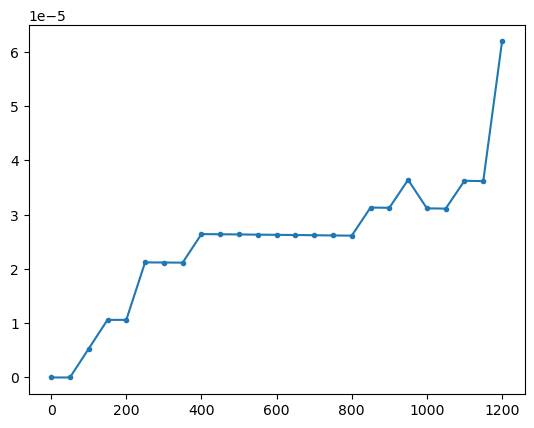

In [15]:
plt.plot(T_list[:25], ylist[:25],marker='.')


# Compare results from three method
1. Method with poltted data, then fitting data and calculate
2. Method with the calculation of the gradient in LD directly
3. Method with the calculation of the gradient in MD directly

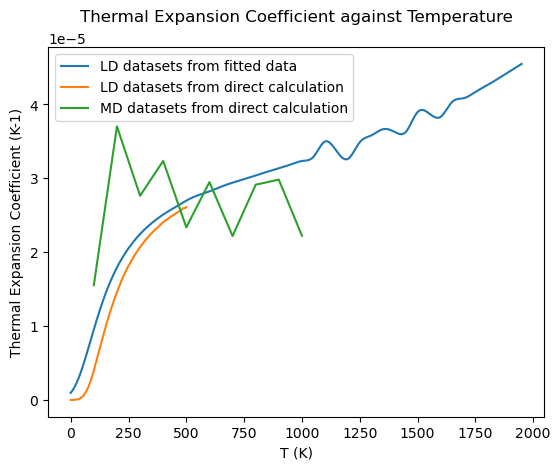

In [14]:
plt.plot(n, m, label='LD datasets from fitted data')
plt.plot(T_list, alpha_list, label='LD datasets from direct calculation')
plt.plot(Tlist, alist, label='MD datasets from direct calculation')

plt.title("Thermal Expansion Coefficient against Temperature\n")

plt.ylabel('Thermal Expansion Coefficient (K-1)')
plt.xlabel('T (K)')
plt.legend()
plt.show()